In [2]:
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib import ticker
from scipy.stats import lognorm

In [3]:
#loading polygons
tv0_dir='DATA/bld_sc/'
polygons=tv0_dir+'polygonsTV0.shp'
df_polygons=geopandas.read_file(polygons)
df_poly_lowinc=df_polygons[df_polygons['type']=='lowIncome']
df_poly_midinc=df_polygons[df_polygons['type']=='midIncome']
df_poly_highinc=df_polygons[df_polygons['type']=='highIncome']
## load buildings
df_build_fac = geopandas.read_file(tv0_dir+'bldPort_TV0_siteclasses.shp')

[]

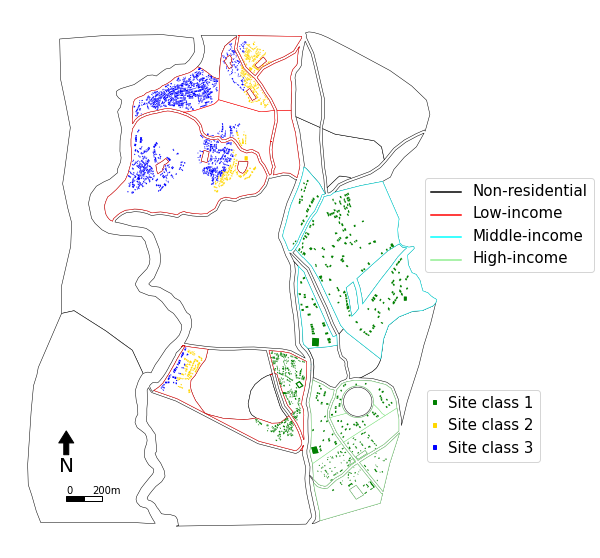

In [4]:
fig,ax=plt.subplots(figsize=(13,10))

# Draw polygons
a=df_polygons.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5,label='Non-residential')
b=df_poly_lowinc.plot(ax=ax,color='white',edgecolor='red',linewidth=0.5,label='Low Income')
c=df_poly_midinc.plot(ax=ax,color='white',edgecolor='cyan',linewidth=0.5,label='Middle Income')
d=df_poly_highinc.plot(ax=ax,color='white',edgecolor='lightgreen',linewidth=0.5,label='High Income')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Draw buildings with different site classes
df_build_fac[df_build_fac['cluster']==0].plot(ax=ax, color='green',linewidth=0.5, label='Site class 1')
df_build_fac[df_build_fac['cluster']==1].plot(ax=ax, color='gold',linewidth=0.5, label='Site class 2')
df_build_fac[df_build_fac['cluster']==2].plot(ax=ax, color='blue',linewidth=0.5, label='Site class 3')

legend_elements1 = [
    patches.Patch(color='green', label='Site class 1'),
    patches.Patch(color='gold', label='Site class 2'),
    patches.Patch(color='blue', label='Site class 3'),
]

legend_elements2 = [Line2D([0], [0], color='black',label='Non-residential'),
                   Line2D([0], [0], color='red',label='Low-income'),
                   Line2D([0], [0], color='cyan',label='Middle-income'),
                   Line2D([0], [0], color='lightgreen',label='High-income')]

legend1=ax.legend(handles=legend_elements1, loc='upper right',bbox_to_anchor=(1.2,0.31),handlelength=0.25,handleheight=0.01,fontsize=15)
ax.add_artist(legend1)
ax.legend(handles=legend_elements2, loc='upper right',bbox_to_anchor=(0.92, 0.5,0.4,0.2),handlelength=2,handleheight=0.01,fontsize=15)

#adding scale and northing arrow
rect = patches.Rectangle((332800, 3056000), 100, 30, linewidth=1, edgecolor='black', facecolor='black',zorder=2)
ax.add_patch(rect)
rect2 = patches.Rectangle((332900, 3056000), 100, 30, linewidth=1, edgecolor='black', facecolor='white',zorder=2)
ax.add_patch(rect2)

ax.text(332800,3056045,'0',c='black',fontsize=10)
ax.text(332950,3056045,'200m',c='black',fontsize=10)
x,y=332800, 3056400
arrow_length=200
ax.annotate('N', xy=(x,y ), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])

[]

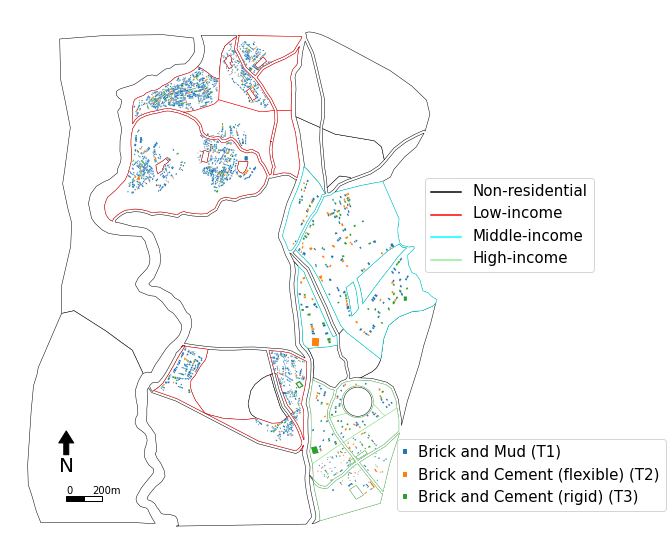

In [4]:
fig,ax=plt.subplots(figsize=(13,10))

a=df_polygons.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5,label='Non-residential')
b=df_poly_lowinc.plot(ax=ax,color='white',edgecolor='red',linewidth=0.5,label='Low-income')
c=df_poly_midinc.plot(ax=ax,color='white',edgecolor='cyan',linewidth=0.5,label='Middle-income')
d=df_poly_highinc.plot(ax=ax,color='white',edgecolor='lightgreen',linewidth=0.5,label='High-income')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Create a custom legend
df_build_fac[df_build_fac['vulnStrEQ']=='BrM+LC+LR'].plot(ax=ax, color='tab:blue',linewidth=0.5, label='Site class 1')
df_build_fac[df_build_fac['vulnStrEQ']=='BrCfl+LC+LR'].plot(ax=ax, color='tab:orange',linewidth=0.5, label='Site class 2')
df_build_fac[df_build_fac['vulnStrEQ']=='BrCri+LC+LR'].plot(ax=ax, color='tab:green',linewidth=0.5, label='Site class 3')
legend_elements1 = [
    patches.Patch(color='tab:blue', label='Brick and Mud (T1)'),
    patches.Patch(color='tab:orange', label='Brick and Cement (flexible) (T2)'),
    patches.Patch(color='tab:green', label='Brick and Cement (rigid) (T3)')
]
legend_elements2 = [Line2D([0], [0], color='black',label='Non-residential'),
                   Line2D([0], [0], color='red',label='Low-income'),
                   Line2D([0], [0], color='cyan',label='Middle-income'),
                   Line2D([0], [0], color='lightgreen',label='High-income')]
legend1=ax.legend(handles=legend_elements2, loc='upper right',bbox_to_anchor=(0.92, 0.5,0.4,0.2),handlelength=2,handleheight=0.01,fontsize=15)
ax.add_artist(legend1)
ax.legend(handles=legend_elements1, loc='upper right',bbox_to_anchor=(1.08, 0.02,0.4,0.2),handlelength=0.25,handleheight=0.01,fontsize=15)
#adding scale
rect = patches.Rectangle((332800, 3056000), 100, 30, linewidth=1, edgecolor='black', facecolor='black',zorder=2)
ax.add_patch(rect)
rect2 = patches.Rectangle((332900, 3056000), 100, 30, linewidth=1, edgecolor='black', facecolor='white',zorder=2)
ax.add_patch(rect2)
ax.text(332800,3056045,'0',c='black',fontsize=10)
ax.text(332950,3056045,'200m',c='black',fontsize=10)
x,y=332800, 3056400
arrow_length=200
ax.annotate('N', xy=(x,y ), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])


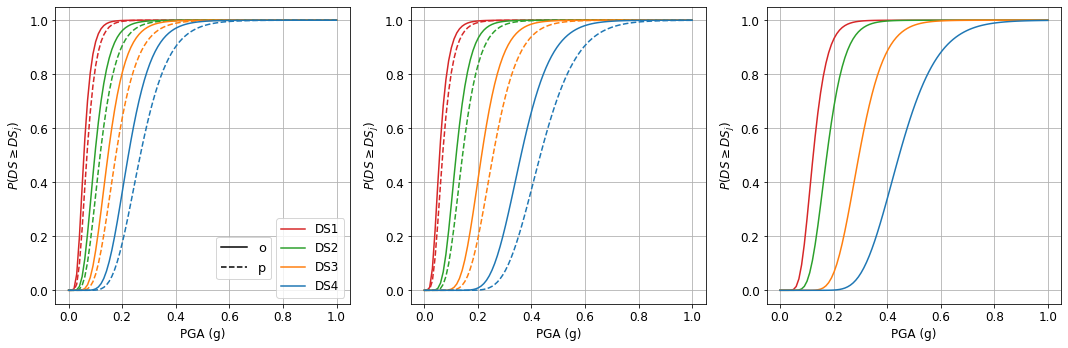

In [5]:
# Ground motion intensity levels
pga_levels = np.linspace(0, 1, 100)
plt.rc('font',size=12)

# Median and dispersion values for the 4 damage states for each building type
building_types = {
    "T1": {
         "medians": [0.057, 0.098, 0.147, 0.223],
        "dispersions": [0.406, 0.404, 0.358, 0.310]
    },
    "T2": {
       
        "medians": [0.057, 0.119, 0.214, 0.361],
        "dispersions": [0.451, 0.349, 0.286, 0.247]
    },
    "T3": {
        "medians": [0.124, 0.175, 0.295, 0.445],
        "dispersions": [0.326, 0.300, 0.254, 0.254]
       
    },
    "T1_upg":{
         "medians": [0.068, 0.118, 0.176, 0.268],
        "dispersions": [0.406, 0.404, 0.358, 0.310]
    },
    "T2_upg":{
          "medians": [0.068, 0.143, 0.257, 0.433],
       "dispersions": [0.451, 0.349, 0.286, 0.247]
    }
}


# Create subplots for each building type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Labels for the damage states
damage_state_labels = ["DS1", "DS2", "DS3", "DS4"]
colors=['tab:red','tab:green','tab:orange','tab:blue']
nbtv=[1910,268,270]
for i, (building_type, data) in enumerate({k: building_types[k] for k in ('T1', 'T2', 'T3')}.items()):
    ax = axes[i]
    medians = data["medians"]
    dispersions = data["dispersions"]    
    for median, dispersion, ds_label,clr in zip(medians, dispersions, damage_state_labels,colors):
        exceedance_probability = lognorm.cdf(pga_levels, s=dispersion, scale=(median))
        ax.plot(pga_levels, exceedance_probability, label=f'{ds_label}',c=clr)
        if i!=2:
            exceedance_probability_upgrade = lognorm.cdf(pga_levels, s=dispersion, scale=(1.2*median))
            ax.plot(pga_levels, exceedance_probability_upgrade,c=clr,linestyle='--')
    
    ax.set_xlabel('PGA (g)')
    ax.set_ylabel(r'$P(DS \geq DS_j)$')
    ax.grid(True)
   
    if i==0:
        first_legend= ax.legend()
        ax.add_artist(first_legend) 
        custom_lines = [Line2D([0], [0], color='black',label='o'),Line2D([0], [0], color='black',linestyle='--',label='p')]
        ax.legend(bbox_to_anchor=(0.64, 0.06), handles =custom_lines,loc='lower center',prop={'size':13}) 
   
plt.tight_layout()